In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your datasets
ny_weather = pd.read_csv('Datasets/NewYork.csv', index_col="date")
dubai_weather = pd.read_csv('Datasets/Dubai.csv', index_col="date")
melbourne_weather = pd.read_csv('Datasets/Melbourne.csv', index_col="date")
sydney_weather = pd.read_csv('Datasets/Sydney.csv', index_col="date")

# Step 2: Add 'city' column to each dataset
ny_weather['city'] = 'New York'
dubai_weather['city'] = 'Dubai'
melbourne_weather['city'] = 'Melbourne'
sydney_weather['city'] = 'Sydney'

# Step 3: Combine datasets
combined_weather_data = pd.concat([ny_weather, dubai_weather, melbourne_weather, sydney_weather])
combined_weather_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
date,,,,,,,,,,,
1/1/2016,42.0,36.0,44.0,0.0,NaN,NaN,14.54,NaN,NaN,NaN,New York
2/1/2016,38.0,34.0,41.0,0.0,NaN,NaN,12.97,NaN,NaN,NaN,New York
3/1/2016,40.0,35.0,48.0,0.0,NaN,NaN,14.09,NaN,NaN,NaN,New York
4/1/2016,34.0,15.0,38.0,0.0,NaN,NaN,19.91,NaN,NaN,NaN,New York
5/1/2016,19.0,12.0,29.0,0.0,NaN,NaN,12.30,NaN,NaN,NaN,New York
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.2,NaN,74.0,11.10,NaN,1010.0,NaN,Sydney
2023-12-29,22.4,20.0,26.1,0.0,NaN,78.0,12.60,NaN,1011.1,NaN,Sydney
2023-12-30,21.6,18.9,26.0,0.0,NaN,153.0,21.10,NaN,1010.7,NaN,Sydney


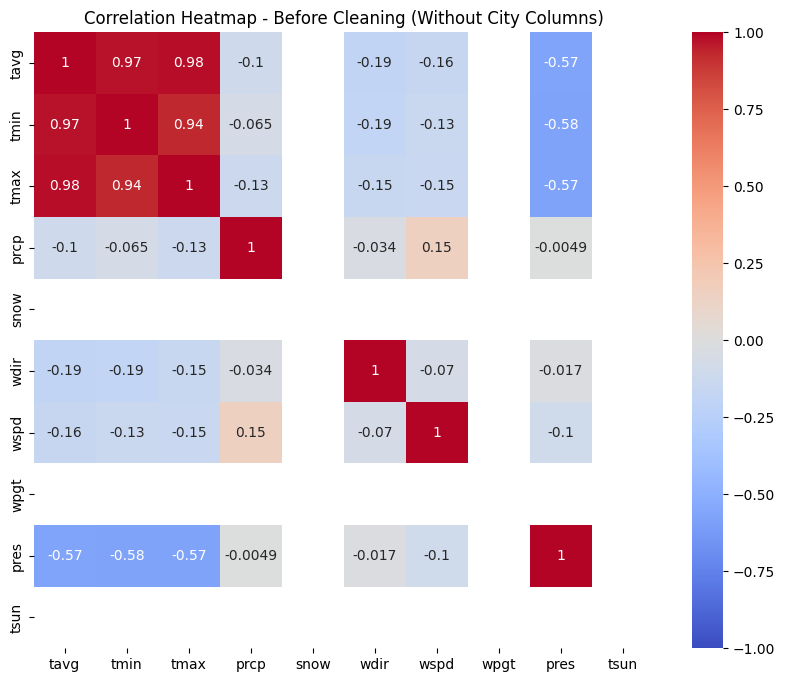

In [226]:
# Step 1: Drop the one-hot encoded 'city' columns temporarily for correlation matrix
# Assuming the one-hot encoded columns start with 'city_' or contain the city names
columns_to_drop = [col for col in combined_weather_data.columns if 'city' in col]
data_without_city = combined_weather_data.drop(columns=columns_to_drop)

# Step 2: Create the correlation matrix without the 'city' columns
correlation_matrix_before = data_without_city.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Before Cleaning (Without City Columns)")
plt.show()


In [227]:
combined_weather_data.apply(pd.isnull).sum()

tavg      137
tmin      137
tmax      136
prcp     2286
snow    11692
wdir     1553
wspd      236
wpgt    11692
pres      739
tsun    11692
city        0
dtype: int64

In [228]:
null_pct = combined_weather_data.apply(pd.isnull).sum()/combined_weather_data.shape[0]
null_pct

tavg    0.011717
tmin    0.011717
tmax    0.011632
prcp    0.195518
snow    1.000000
wdir    0.132826
wspd    0.020185
wpgt    1.000000
pres    0.063206
tsun    1.000000
city    0.000000
dtype: float64

In [229]:
valid_columns = combined_weather_data.columns[null_pct < 0.5]
valid_columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'city'], dtype='object')

In [230]:
combined_weather_data = combined_weather_data[valid_columns].copy()
combined_weather_data

,tavg,tmin,tmax,prcp,wdir,wspd,pres,city
date,,,,,,,,
1/1/2016,42.0,36.0,44.0,0.0,NaN,14.54,NaN,New York
2/1/2016,38.0,34.0,41.0,0.0,NaN,12.97,NaN,New York
3/1/2016,40.0,35.0,48.0,0.0,NaN,14.09,NaN,New York
4/1/2016,34.0,15.0,38.0,0.0,NaN,19.91,NaN,New York
5/1/2016,19.0,12.0,29.0,0.0,NaN,12.30,NaN,New York
...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.2,74.0,11.10,1010.0,Sydney
2023-12-29,22.4,20.0,26.1,0.0,78.0,12.60,1011.1,Sydney
2023-12-30,21.6,18.9,26.0,0.0,153.0,21.10,1010.7,Sydney


In [231]:
combined_weather_data['pres'] = combined_weather_data['pres'].fillna(combined_weather_data['pres'].mean())
combined_weather_data['tmax'] = combined_weather_data['tmax'].fillna(combined_weather_data['tmax'].mean())
combined_weather_data['prcp'] = combined_weather_data['prcp'].fillna(combined_weather_data['prcp'].mean())
combined_weather_data['wspd'] = combined_weather_data['wspd'].fillna(combined_weather_data['wspd'].mean())
combined_weather_data['wdir'] = combined_weather_data['wdir'].fillna(combined_weather_data['wdir'].mean())
combined_weather_data['tmin'] = combined_weather_data['tmin'].fillna(combined_weather_data['tmin'].mean())
combined_weather_data['tavg'] = combined_weather_data['tavg'].fillna(combined_weather_data['tavg'].mean())


combined_weather_data


,tavg,tmin,tmax,prcp,wdir,wspd,pres,city
date,,,,,,,,
1/1/2016,42.0,36.0,44.0,0.0,191.832626,14.54,1015.079677,New York
2/1/2016,38.0,34.0,41.0,0.0,191.832626,12.97,1015.079677,New York
3/1/2016,40.0,35.0,48.0,0.0,191.832626,14.09,1015.079677,New York
4/1/2016,34.0,15.0,38.0,0.0,191.832626,19.91,1015.079677,New York
5/1/2016,19.0,12.0,29.0,0.0,191.832626,12.30,1015.079677,New York
...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.2,74.000000,11.10,1010.000000,Sydney
2023-12-29,22.4,20.0,26.1,0.0,78.000000,12.60,1011.100000,Sydney
2023-12-30,21.6,18.9,26.0,0.0,153.000000,21.10,1010.700000,Sydney


In [232]:
combined_weather_data.apply(pd.isnull).sum()

tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
city    0
dtype: int64

In [233]:

# Select only the numeric columns for calculating IQR
numeric_cols = combined_weather_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = combined_weather_data[numeric_cols].quantile(0.25)
Q3 = combined_weather_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to detect and remove outliers for numeric columns
outlier_filter = ~((combined_weather_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (combined_weather_data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Apply filter to remove rows with outliers in numeric columns
combined_weather_data_no_outliers = combined_weather_data[outlier_filter.all(axis=1)]

# Display to confirm outliers are removed
combined_weather_data_no_outliers.shape


(10117, 8)

In [234]:
combined_weather_data_no_outliers.to_csv('NewCombined.csv', index="date")

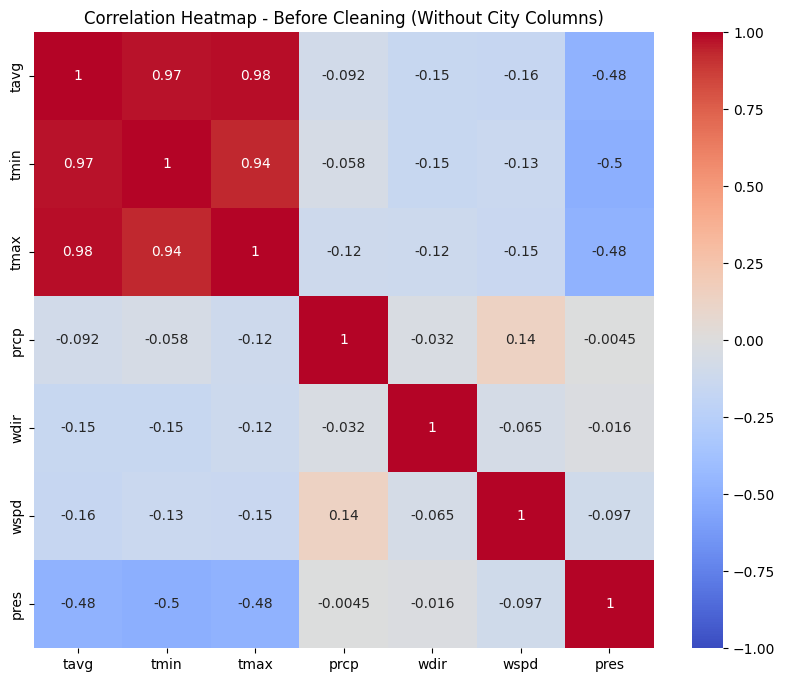

In [235]:
# Step 1: Drop the one-hot encoded 'city' columns temporarily for correlation matrix
# Assuming the one-hot encoded columns start with 'city_' or contain the city names
columns_to_drop = [col for col in combined_weather_data.columns if 'city' in col]
data_without_city = combined_weather_data.drop(columns=columns_to_drop)

# Step 2: Create the correlation matrix without the 'city' columns
correlation_matrix_before = data_without_city.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Before Cleaning (Without City Columns)")
plt.show()


In [236]:
import numpy as np
from sklearn.model_selection import train_test_split

numeric_features = combined_weather_data_no_outliers.select_dtypes(include=[np.number])

combined_weather_data = pd.get_dummies(combined_weather_data, columns=['city'], drop_first=True)


# Select only numeric columns for training (replace 'target_column' with the actual column name you're predicting)
X = combined_weather_data.drop(columns=['tmax', 'tmin'])  # Features (input)
y = combined_weather_data[['tmax', 'tmin']]  # Target (output)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (9353, 8)
X_test shape: (2339, 8)
y_train shape: (9353, 2)
y_test shape: (2339, 2)


In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regression_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_linear_tmin = mean_squared_error(y_test['tmin'], y_pred_linear[:, 1])
mse_linear_tmax = mean_squared_error(y_test['tmax'], y_pred_linear[:, 0])

# Calculate R² score for tmin and tmax
r2_linear_tmin = r2_score(y_test['tmin'], y_pred_linear[:, 1])
r2_linear_tmax = r2_score(y_test['tmax'], y_pred_linear[:, 0])

# Print the results for Linear Regression
print(f"Linear Regression - MSE for tmin: {mse_linear_tmin}")
print(f"Linear Regression - MSE for tmax: {mse_linear_tmax}")
print(f"Linear Regression - R² for tmin: {r2_linear_tmin}")
print(f"Linear Regression - R² for tmax: {r2_linear_tmax}")


Linear Regression - MSE for tmin: 4.859937000393305
Linear Regression - MSE for tmax: 3.2921633569306086
Linear Regression - R² for tmin: 0.9477855241159362
Linear Regression - R² for tmax: 0.9708828678683947


In [238]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_rf_tmin = mean_squared_error(y_test['tmin'], y_pred_rf[:, 1])
mse_rf_tmax = mean_squared_error(y_test['tmax'], y_pred_rf[:, 0])

# Calculate R² score for tmin and tmax
r2_rf_tmin = r2_score(y_test['tmin'], y_pred_rf[:, 1])
r2_rf_tmax = r2_score(y_test['tmax'], y_pred_rf[:, 0])

# Print the results for Random Forest
print(f"Random Forest - MSE for tmin: {mse_rf_tmin}")
print(f"Random Forest - MSE for tmax: {mse_rf_tmax}")
print(f"Random Forest - R² for tmin: {r2_rf_tmin}")
print(f"Random Forest - R² for tmax: {r2_rf_tmax}")


Random Forest - MSE for tmin: 3.6207568526321845
Random Forest - MSE for tmax: 2.923958729156229
Random Forest - R² for tmin: 0.961099100389877
Random Forest - R² for tmax: 0.9741394082146705


In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the classification function for weather types
def classify_weather(row):
    if row['prcp'] > 0.1:
        return 'Rainy'
    elif row['wspd'] > 15:  # Example threshold for windy day
        return 'Windy'
    else:
        return 'Sunny'

# Step 2: Apply the function to create a new 'weather_type' column
combined_weather_data_no_outliers.loc[:, 'weather_type'] = combined_weather_data_no_outliers.apply(classify_weather, axis=1)

# Step 3: Drop any non-numeric columns, except for 'weather_type' (target)
# One-hot encode the 'city' column if it still exists as a string
X_classification = pd.get_dummies(combined_weather_data_no_outliers.drop(columns=['weather_type']), drop_first=True)

# Step 4: The target column (weather_type)
y_classification = combined_weather_data_no_outliers['weather_type']

# Step 5: Split the data: 80% for training, 20% for testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Step 7: Predict on the test data
y_pred_class = rf_classifier.predict(X_test_class)

# Step 8: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))

# Step 9: Save the DataFrame including the 'weather_type' column to a new CSV file
combined_weather_data_no_outliers.to_csv('NewCombined.csv', index=True)

print("CSV file with 'weather_type' column saved successfully.")


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_10976/2355813738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers.loc[:, 'weather_type'] = combined_weather_data_no_outliers.apply(classify_weather, axis=1)


Accuracy: 1.0
              precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00       813
       Sunny       1.00      1.00      1.00       645
       Windy       1.00      1.00      1.00       566

    accuracy                           1.00      2024
   macro avg       1.00      1.00      1.00      2024
weighted avg       1.00      1.00      1.00      2024

CSV file with 'weather_type' column saved successfully.


In [240]:
import joblib

# Assuming you have trained a model, for example:
linear_reg = LinearRegression().fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(linear_reg, 'enhancedweather_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [241]:

import joblib
import pandas as pd

# Load the saved model (assuming you saved it using joblib)
model = joblib.load('enhancedweather_model.pkl')

# Example of input weather data for a specific day (new data to predict the next day's weather)
new_data = {
    'tavg': [25],    # Average temperature
    'prcp': [0.05],  # Precipitation
    'wdir': [180],   # Wind direction (example default value)
    'wspd': [10],    # Wind speed
    'pres': [1013],  # Pressure
    
    'city_Melbourne': [0],
    'city_New York': [1],  # One-hot encoded city (New York in this case)
    'city_Sydney': [0]
    
    
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# List of features used during training (must match exactly)
features_used_during_training = ['tavg', 'prcp', 'wdir', 'wspd', 'pres', 'city_Melbourne','city_New York','city_Sydney']

# Ensure the new data has all the necessary columns in the correct order
new_data_complete = pd.DataFrame(new_data, columns=features_used_during_training)

# Use the model to predict 'tmin' and 'tmax' for the next day
predictions = model.predict(new_data_complete)

# Extract Tmin and Tmax predictions
tmin_pred, tmax_pred = predictions[0]

print(f"Predicted Tmin: {tmin_pred}")
print(f"Predicted Tmax: {tmax_pred}")




Predicted Tmin: 30.21680700080483
Predicted Tmax: 20.592051467826593
